<a href="https://colab.research.google.com/github/SohanDhara/credit-card-fraud-detection/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve,accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
# Loading the dataset
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [ ]:
# Checking class distribution
class_counts = credit_card_data['Class'].value_counts()
print(class_counts)

Class
0    284315
1       492
Name: count, dtype: int64


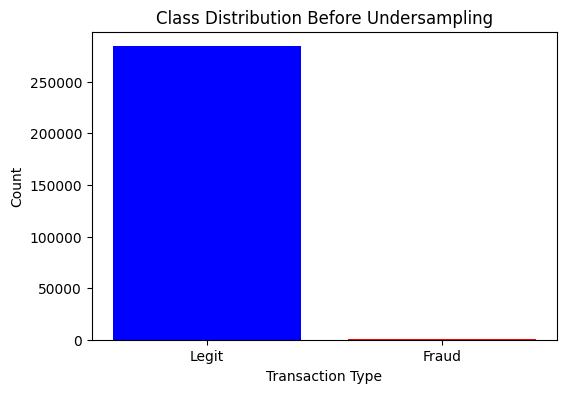

In [ ]:
# Bar plot for class distribution
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])
plt.xticks([0, 1], ['Legit', 'Fraud'])
plt.title("Class Distribution Before Undersampling")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

In [ ]:
class_counts.isnull().sum()

0

In [ ]:
# Separating legit and fraud transactions
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
# Undersampling legit transactions
legit_sample = legit.sample(n=492)
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
#Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_dataset.drop('Class', axis=1))

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(new_dataset.drop('Class', axis=1))


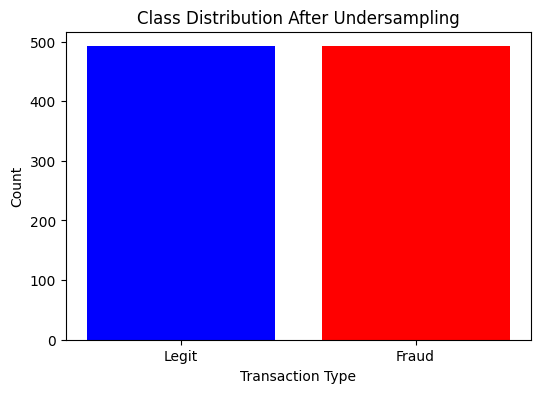

In [ ]:
# Class distribution after undersampling
new_class_counts = new_dataset['Class'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(new_class_counts.index, new_class_counts.values, color=['blue', 'red'])
plt.xticks([0, 1], ['Legit', 'Fraud'])
plt.title("Class Distribution After Undersampling")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()


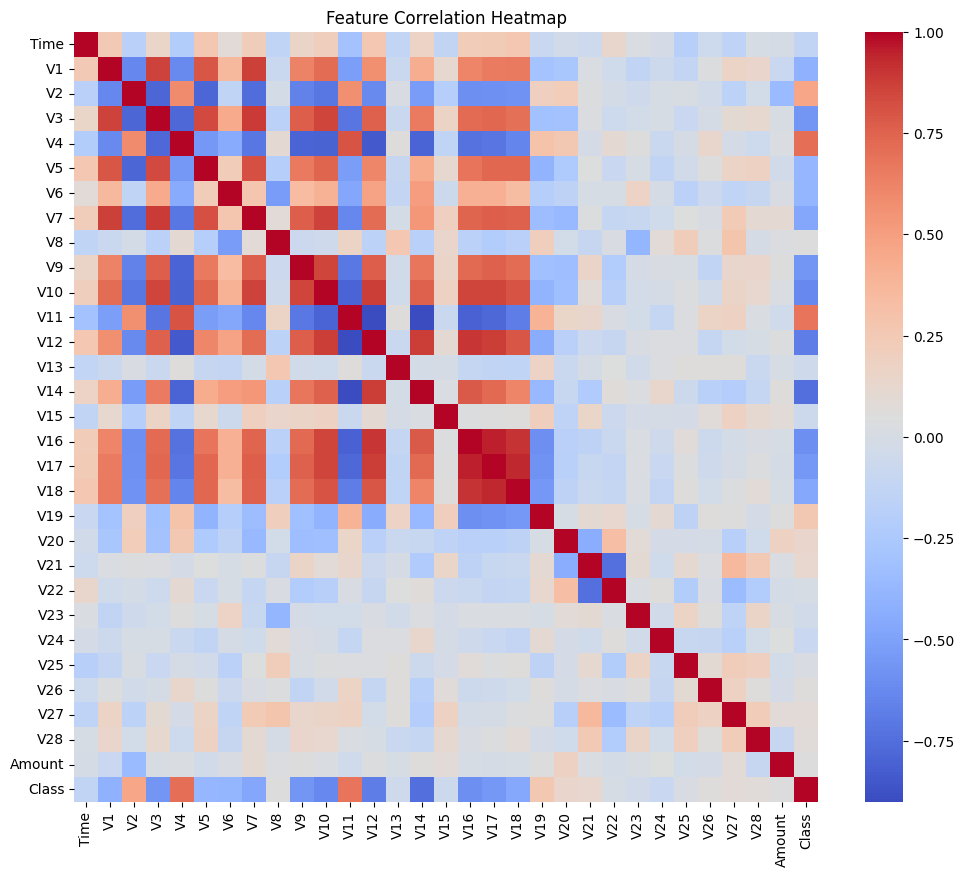

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(new_dataset.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Splitting data into features and target
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)
lr_train_accuracy = accuracy_score(Y_train, lr_model.predict(X_train))
lr_test_accuracy = accuracy_score(Y_test, lr_model.predict(X_test))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)
dt_train_accuracy = accuracy_score(Y_train, dt_model.predict(X_train))
dt_test_accuracy = accuracy_score(Y_test, dt_model.predict(X_test))

In [ ]:
# Printing accuracy scores
print(f"Logistic Regression Training Accuracy: {lr_train_accuracy:.2f}")
print(f"Logistic Regression Testing Accuracy: {lr_test_accuracy:.2f}")
print(f"Decision Tree Training Accuracy: {dt_train_accuracy:.2f}")
print(f"Decision Tree Testing Accuracy: {dt_test_accuracy:.2f}")

Logistic Regression Training Accuracy: 0.94
Logistic Regression Testing Accuracy: 0.94
Decision Tree Training Accuracy: 1.00
Decision Tree Testing Accuracy: 0.89


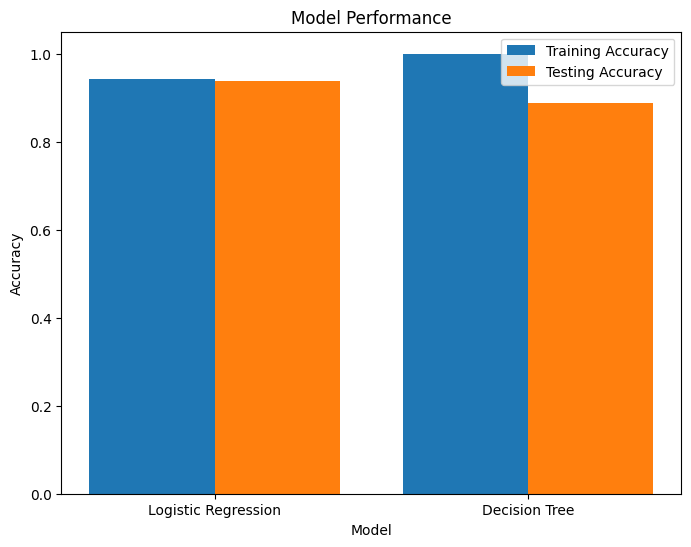

In [ ]:
# Bar graph for model performance
models = ['Logistic Regression', 'Decision Tree']
train_accuracies = [lr_train_accuracy, dt_train_accuracy]
test_accuracies = [lr_test_accuracy, dt_test_accuracy]

plt.figure(figsize=(8, 6))
X_axis = np.arange(len(models))
plt.bar(X_axis - 0.2, train_accuracies, 0.4, label='Training Accuracy')
plt.bar(X_axis + 0.2, test_accuracies, 0.4, label='Testing Accuracy')
plt.xticks(X_axis, models)
plt.title("Model Performance")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

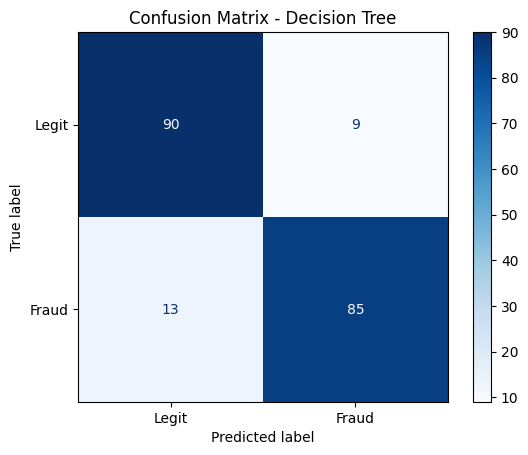

In [ ]:
#Confusion matrix for Decision Tree
conf_matrix = confusion_matrix(Y_test, dt_model.predict(X_test))
ConfusionMatrixDisplay(conf_matrix, display_labels=['Legit', 'Fraud']).plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [ ]:
# Making a prediction using Decision Tree
sample_transaction = [[160731.0, 1.974175, 0.384640, 0.216342, 0.531801, -0.805517, -0.619905, -0.577300, -0.082501, 1.424101, -0.203128, 0.198045, 0.844739, 0.116753, 0.079763, -0.088310, -0.216761, 0.043702, -0.035513, 0.934795, -1.194808, -0.755550, -0.285005, 0.848708, 0.375612, -0.246720, -0.061286, 0.063536, 0.238845, 390.00]]
prediction = dt_model.predict(sample_transaction)
print(f"Prediction for the sample transaction: {'Fraud' if prediction[0] == 1 else 'Legit'}")

Prediction for the sample transaction: Legit


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# 1. Feature Importance (Decision Tree)
feature_importance = dt_model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importance)[::-1]

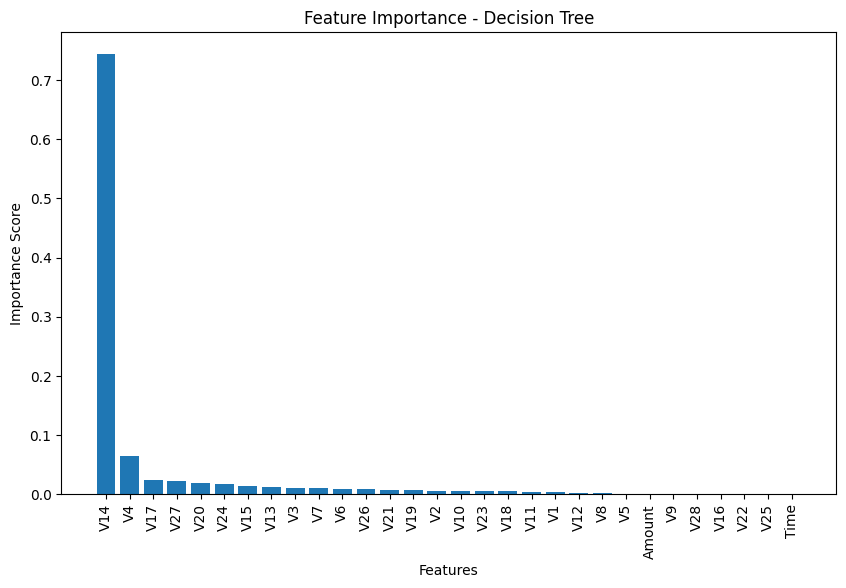

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.xticks(range(len(feature_importance)), feature_names[sorted_idx], rotation=90)
plt.title("Feature Importance - Decision Tree")  # New Graph 1
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

In [ ]:
# 2. ROC Curve & AUC (Logistic Regression)
y_scores = lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_scores)
roc_auc = auc(fpr, tpr)

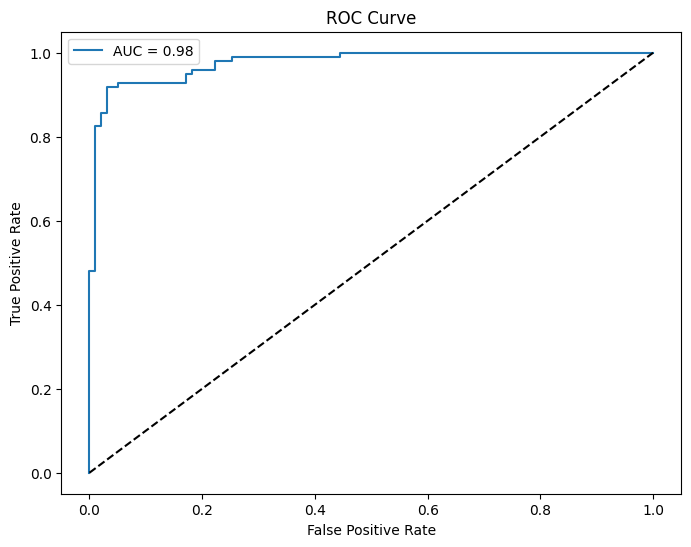

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')  # New Graph 2
plt.legend()
plt.show()

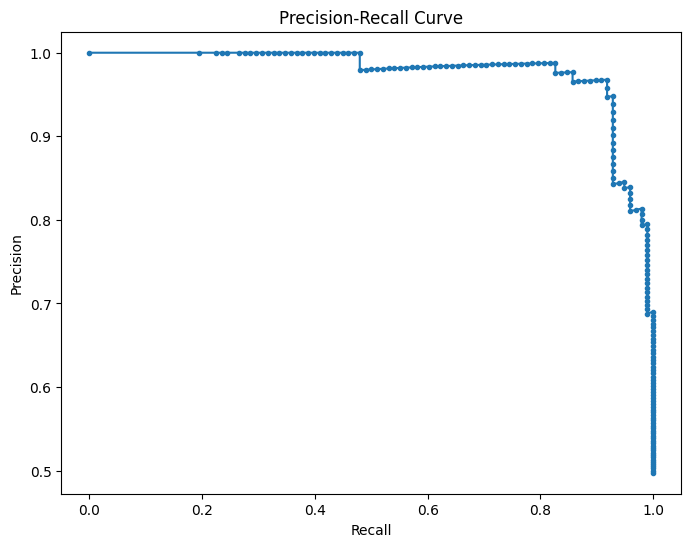

In [ ]:
# 3. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(Y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')  # New Graph 3
plt.show()

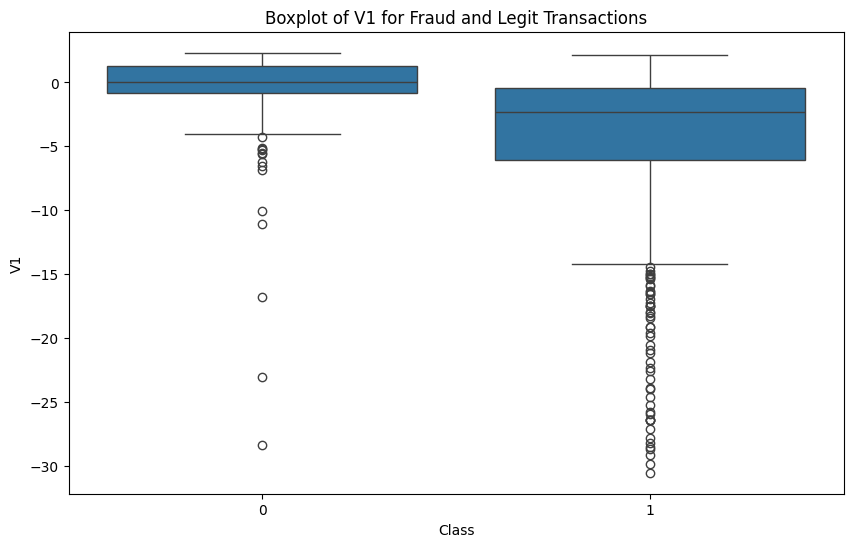

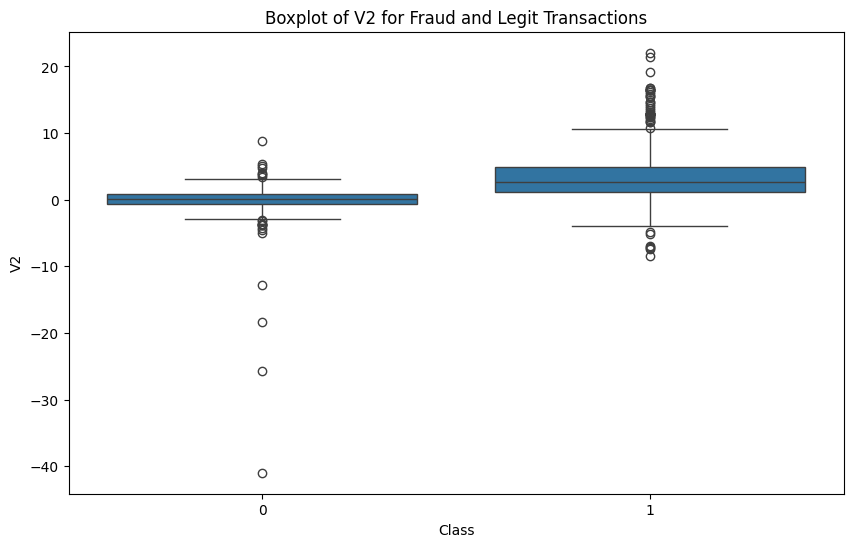

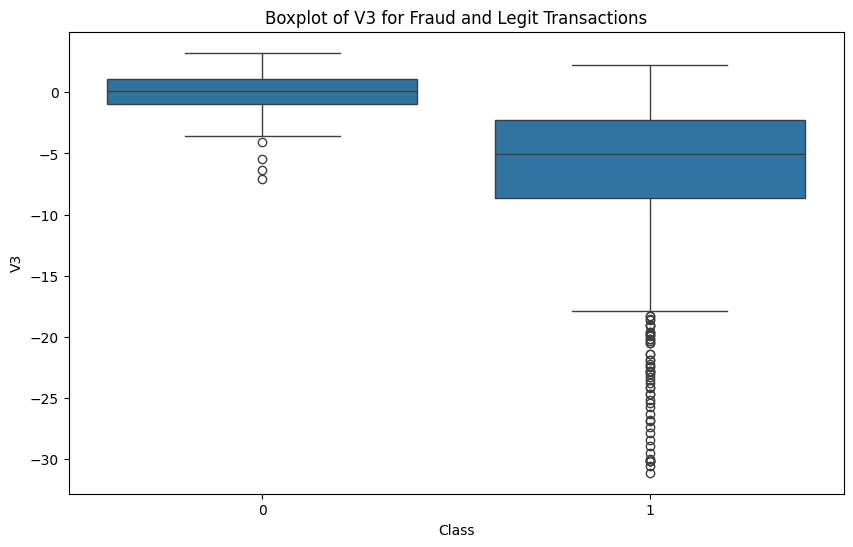

In [ ]:
# 4. Boxplot for Feature Distributions
sample_features = ["V1", "V2", "V3"]  # Use a few selected features

for feature in sample_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=new_dataset['Class'], y=new_dataset[feature])
    plt.title(f'Boxplot of {feature} for Fraud and Legit Transactions')  # New Graph 4
    plt.show()